In [1]:
with open("data/lenta.txt") as f:
    corpus = f.read()

In [2]:
corpus[:98]

'Бои у Сопоцкина и Друскеник закончились отступлением германцев. Неприятель, приблизившись с севера'

## Задание 1.

Посчитайте частоты для 5-грамм в корпусе lenta.txt. двумя способами:  
1) lenta.txt -> sent_tokenize (russian) -> word_tokenize -> ngrammer  
2) lenta.txt -> word_tokene(preserve_line=True) - ngrammer  
    
Проанализируйте топ-20 самых частотных нграмм и проверьте есть ли различия? 

In [3]:
import string
import re
from nltk import sent_tokenize, word_tokenize
from collections import Counter

In [4]:
def ngrammer(tokens: list, *, ngramms: int = 2):
    ngrs = []
    for i in range(len(tokens)-ngramms+1):
        ngramm = " ".join(tokens[i:i+ngramms])
        ngrs.append(ngramm)
    return ngrs

In [5]:
tokenized_one = [[word.lower() for word in word_tokenize(sent) if not re.match(r"\W+", word)] for sent in sent_tokenize(corpus, "russian")]

In [6]:
counter = Counter()

for sentence in tokenized_one:
    counter.update(ngrammer(sentence, ngramms = 5))

In [7]:
counter.most_common(20)

[('риа новости со ссылкой на', 400),
 ('сообщает риа новости со ссылкой', 320),
 ('как сообщили риа новости в', 196),
 ('как сообщает риа новости со', 149),
 ('сообщает интерфакс со ссылкой на', 142),
 ('сообщает итар-тасс со ссылкой на', 118),
 ('об этом риа новости сообщили', 113),
 ('об этом сообщает риа новости', 104),
 ('этом риа новости сообщили в', 99),
 ('со ссылкой на источники в', 93),
 ('сообщили риа новости в пресс-службе', 88),
 ('группировки войск на северном кавказе', 84),
 ('как сообщает интерфакс со ссылкой', 83),
 ('объединенной группировки войск на северном', 83),
 ('новости со ссылкой на пресс-службу', 76),
 ('эхо москвы со ссылкой на', 76),
 ('этом сообщает риа новости со', 75),
 ('в связи с тем что', 70),
 ('по борьбе с организованной преступностью', 66),
 ('как сообщает итар-тасс со ссылкой', 58)]

### 

In [8]:
tokenized_two = [word.lower() for word in word_tokenize(corpus, preserve_line=True) if not re.match(r"\W+", word)]

In [9]:
counter = Counter()

counter.update(ngrammer(tokenized_two, ngramms = 5))

In [10]:
counter.most_common(20)

[('риа новости со ссылкой на', 400),
 ('сообщает риа новости со ссылкой', 320),
 ('как сообщили риа новости в', 196),
 ('как сообщает риа новости со', 149),
 ('сообщает интерфакс со ссылкой на', 142),
 ('сообщает итар-тасс со ссылкой на', 118),
 ('об этом риа новости сообщили', 113),
 ('об этом сообщает риа новости', 104),
 ('этом риа новости сообщили в', 99),
 ('со ссылкой на источники в', 93),
 ('сообщили риа новости в пресс-службе', 88),
 ('как сообщает интерфакс со ссылкой', 83),
 ('объединенной группировки войск на северном', 83),
 ('эхо москвы со ссылкой на', 77),
 ('новости со ссылкой на пресс-службу', 76),
 ('этом сообщает риа новости со', 75),
 ('в связи с тем что', 70),
 ('как сообщает итар-тасс со ссылкой', 58),
 ('группировки войск на северном кавказе', 57),
 ('по борьбе с организованной преступностью', 55)]

Различия начинают наблюдаться с уменьшением частотности, наиболее частотные группы сохраняют свой ранг, а зачастую и точное значение частотности. Также при уменьшении длины н-грамм распределения начинают расходиться.

## Задание 2.

Найдите какую-то инетересную (по вашему мнению) закономерность на https://books.google.com/ngrams/ для русского языка (с 1990 по 2019)

Вставьте сюда скриншот

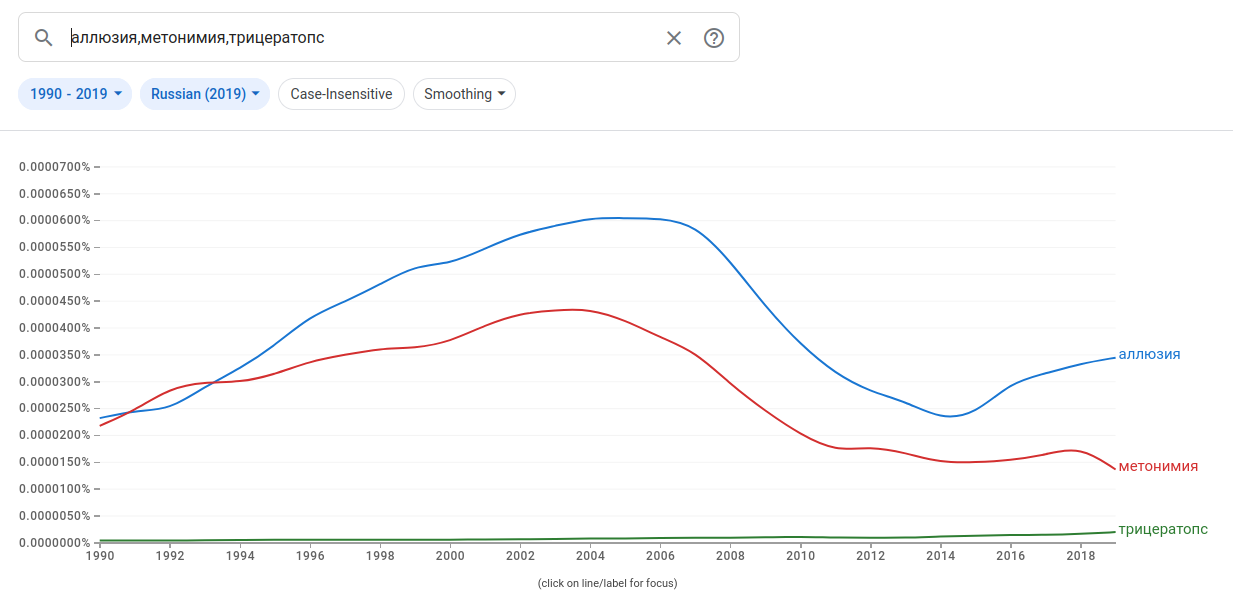

## Заданиe 3

Когда мы разбирали PMI мы использовали такую функцию:

In [80]:
def scorer_simple(word_count_a, word_count_b, bigram_count, min_count = 20, *args, **kwargs):
    try:
        score = (bigram_count - min_count)/(word_count_a+word_count_b)
    except ZeroDivisionError:
        return 0
    return score

Но если вы посмотрите на определение в википедии, то увидите, что формула немного другая ![](https://wikimedia.org/api/rest_v1/media/math/render/svg/094243d23c19d2d032f6bb26c4dc4f47d98d32f8)

Перепишите функцию, чтобы она точно соответствовала этому определению. Расчитайте PMI для всех биграммов также как мы делали в семинаре с помощью функции score_bigrams используя изначальный scorer и обновленный. Посмотрите есть ли разница в топ-10 биграммов. Подумайте почему результаты совпадают/отличаются?

*Подсказка: для вероятностей можно поделить на количество слов в корпусе

In [81]:
from nltk.corpus import stopwords
from typing import Callable

rustops = set(stopwords.words("russian"))

In [82]:
from math import log2

def scorer_pmi(word_count_a: int, word_count_b: int, bigram_count: int, corpus_length: int, min_count: int = 20, *args, **kwargs):
    try:
        score = log2((bigram_count - min_count)/ word_count_a / word_count_b * corpus_length)
    except ValueError:
        return 0
    except ZeroDivisionError:
        return 0
    return score


def ngrammer(tokens: list, *, ngramms: list = 2, stops: set = set()):
    ngrams = []
    tokens = [token for token in tokens if token not in stops]
    for i in range(len(tokens)-ngramms+1):
        ngrams.append(' '.join(tokens[i:i+ngramms]))
    return ngrams

In [99]:
def collect_stats(corpus: list, stops: set):
    
    unigrams = Counter()
    bigrams = Counter()
    
    for sent in corpus:
        unigrams.update(sent)
        bigrams.update(ngrammer(sent, ngramms = 2, stops = stops))
    
    return unigrams, bigrams

def score_bigrams(unigrams: dict, bigrams: dict, scorer: Callable, threshold: int=-100000, min_count = 20):
    ## посчитаем метрику для каждого нграмма
    bigram2score = Counter()
    corpus_length = len(unigrams) + len(bigrams)
    
    for bigram in bigrams:
        word_a, word_b = bigram.split()
        score = scorer(unigrams[word_a], unigrams[word_b], 
                       bigrams[bigram], corpus_length = corpus_length, min_count = 20)
        
        ## если метрика выше порога, добавляем в словарик
        if score > threshold:
            bigram2score[bigram] = score
    
    return bigram2score

In [100]:
unigrams, bigrams = collect_stats(tokenized_one, rustops)

In [101]:
bigram2score = score_bigrams(unigrams, bigrams, scorer_simple)

In [102]:
bigram2score.most_common(20)

[('риа новости', 0.4900746163592848),
 ('северном кавказе', 0.44553483807654565),
 ('associated press', 0.4345991561181435),
 ('new york', 0.4218009478672986),
 ('сих пор', 0.39092055485498106),
 ('взрывное устройство', 0.3665768194070081),
 ('таким образом', 0.3657187993680885),
 ('рао еэс', 0.33954451345755693),
 ('доменных имен', 0.31512605042016806),
 ('чрезвычайным ситуациям', 0.30935251798561153),
 ('налогам сборам', 0.30201342281879195),
 ('wall street', 0.3018867924528302),
 ('населенного пункта', 0.3013698630136986),
 ('объединенной группировки', 0.2993421052631579),
 ('возбуждено уголовное', 0.2983606557377049),
 ('мадлен олбрайт', 0.29743589743589743),
 ('прошлой неделе', 0.29006085192697767),
 ('владимиром путиным', 0.2899022801302932),
 ('внутренних дел', 0.2847811887655127),
 ('точки зрения', 0.2828282828282828)]

In [103]:
bigram2score = score_bigrams(unigrams, bigrams, scorer_pmi)

In [104]:
bigram2score.most_common(20)

[('wall street', 13.280508073979414),
 ('саудовской аравии', 13.268658798491392),
 ('street journal', 13.096425009540441),
 ('dow jones', 13.070499377098798),
 ('подписных листов', 13.023881588125843),
 ('следственном изоляторе', 13.00076923303325),
 ('чрезвычайным ситуациям', 12.92489008823105),
 ('france presse', 12.905760295726287),
 ('персидском заливе', 12.90002779673694),
 ('полевые командиры', 12.899334026566855),
 ('полевых командиров', 12.800375546478685),
 ('налогам сборам', 12.797235838948119),
 ('следственный изолятор', 12.735835294283975),
 ('великой отечественной', 12.724887658018663),
 ('exit polls', 12.71346748125552),
 ('верховной рады', 12.69144117492552),
 ('чести достоинства', 12.676941605230406),
 ('населенном пункте', 12.641317695499685),
 ('washington post', 12.630885026304794),
 ('соединенные штаты', 12.621051847034122)]

## Задание 4*

Обновите функцию получившуюся в предыдущем задании так, чтобы вместо произведения/деления вероятностей использовались сложение и вычитание логирифмов. 

In [48]:
from math import log2

def scorer_pmi(word_count_a: int, word_count_b: int, bigram_count: int, corpus_length: int, min_count: int = 20, *args):
    try:
        score = log2(bigram_prob/corpus_length) - log2(word_prob_a/corpus_length) - log2(word_count_b/corpus_length)
    except ValueError:
        return 0
    return score

## Задание 5

Исследуйте gensim.models.Phrases. Проверьте сколько дефолтных scoring функций есть в этом классе. Попробуйте все доступные по умолчанию scoring функции и попробуйте настраивать для них значение threshold и min_count. Попробуйте сделать так, чтобы собиралось как можно больше нграммов. Попробуйте строить последовательность gensim.models.Phrases, чтобы строить более длинные нграммы

In [89]:
import gensim

##### существуют два дефолтных скорера - default и npmi

In [185]:
ph = gensim.models.Phrases(tokenized_one, 
                    min_count = 1, 
                    threshold=0.0001,
                    scoring = "npmi")

In [186]:
phraser = gensim.models.phrases.Phraser(ph)

In [187]:
ph2 = gensim.models.Phrases(phraser[tokenized_one],  min_count=1, threshold=0.001, scoring = "npmi")
p2 = gensim.models.phrases.Phraser(ph2)

In [188]:
tokenized_one[8]

['при',
 'продолжающемся',
 'отступлении',
 'австрийцев',
 'обнаруживается',
 'полное',
 'перемешивание',
 'их',
 'частей',
 'захватываются',
 'новые',
 'партии',
 'пленных',
 'орудия',
 'и',
 'прочая',
 'материальная',
 'часть']

In [189]:
p2[phraser[tokenized_one[8]]]

['при_продолжающемся_отступлении_австрийцев',
 'обнаруживается_полное',
 'перемешивание_их',
 'частей_захватываются_новые_партии',
 'пленных_орудия',
 'и_прочая_материальная_часть']